In [72]:
from scipy import stats
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

## Dataset: Rain in Australia

### Problema a resolver

Predecir, en base a los datos meteorológicos del día actual, si el día de mañana va a llover.

## Análisis exploratorio inicial

In [16]:
dataset = pd.read_csv('dataset/weatherAUS.csv')
dataset.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [79]:
dataset.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [17]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [40]:
dataset[dataset.duplicated(keep=False)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


No existen observaciones duplicadas.

## Descripción de variables

### Variable: Date

Indica la fecha en que fue realizada la observación.



In [68]:
tiene_duplicados_date = len(dataset[dataset.duplicated(subset=['Date'], keep=False)]) > 0
print('¿Valores duplicados por variable Date?: ', 'Sí' if tiene_duplicados else 'No')

tiene_duplicados_date_location = len(dataset[dataset.duplicated(subset=['Date', 'Location'], keep=False)]) > 0
print('¿Valores duplicados por variables Date y Location?: ', 'Sí' if tiene_duplicados_date_location else 'No')
dataset[dataset.duplicated(subset=['Date', 'Location'], keep=False)]

len(dataset[dataset['Date'] == '2011-12-10']['Location'])

¿Valores duplicados por variable Date?:  Sí
¿Valores duplicados por variables Date y Location?:  No


46

### Variable: Location

Ubicación de la estación meteorológica donde se obtuvo la observación.

Tipo: Cualitativa Nominal.

In [38]:
print('Valores únicos: ',dataset['Location'].unique())
print('Cardinalidad: ', len(dataset['Location'].unique()))

Valores únicos:  ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Cardinalidad:  49


No hay valores que sugieran errores en los datos, o nulos. En total hay 49 ubicaciones diferentes.

C:\Users\Usuario\anaconda3\envs\env_introia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\envs\env_introia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


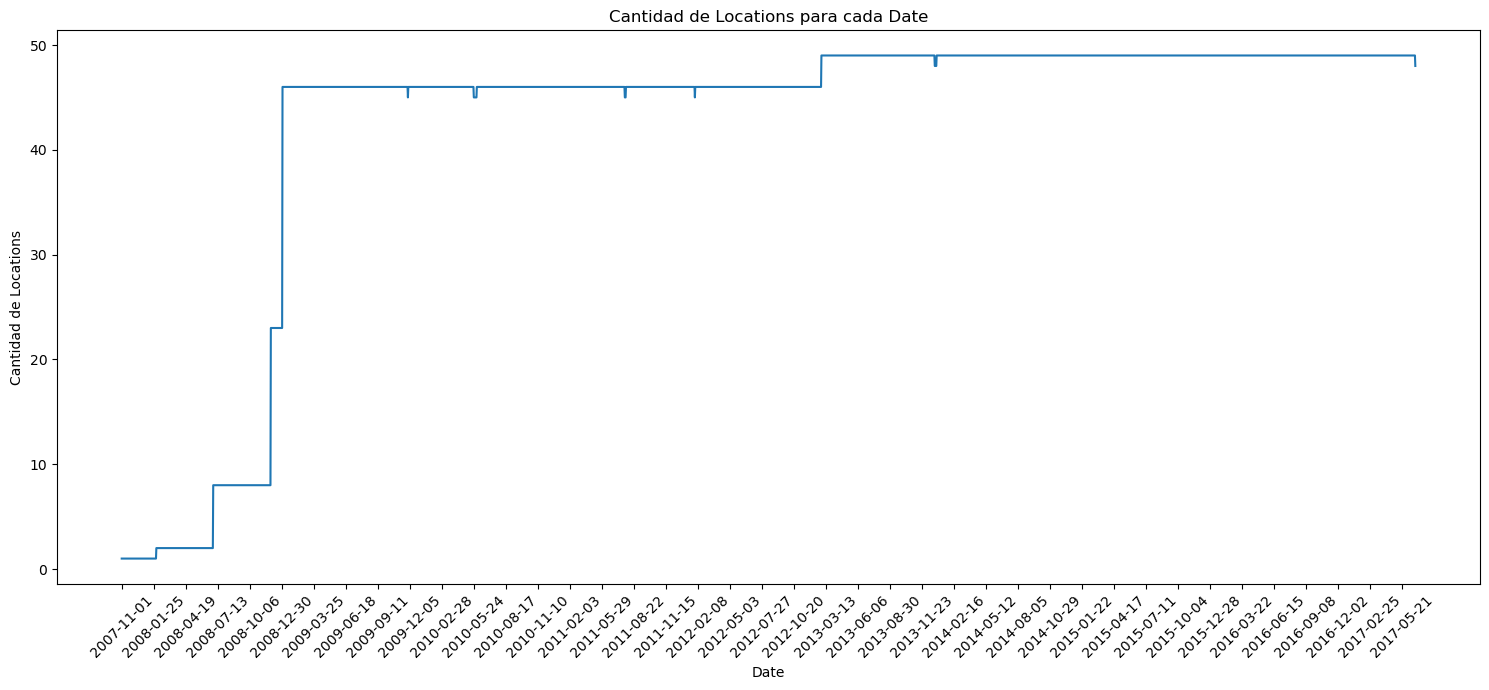

In [78]:
location_counts = dataset.groupby('Date')['Location'].count().reset_index()

location_counts.columns = ['Date', 'LocationCount']

plt.figure(figsize=(15, 7))
sns.lineplot(data=location_counts, x='Date', y='LocationCount')
plt.title('Cantidad de Locations para cada Date')
plt.xlabel('Date')
plt.ylabel('Cantidad de Locations')

num_dates = 40 
dates_to_show = location_counts['Date'][::len(location_counts)//num_dates]

plt.xticks(ticks=dates_to_show.index, labels=dates_to_show, rotation=45)
plt.tight_layout()
plt.show()

En este gráfico se puede observar que en cada observación no necesariamente se tiene información de todas las estaciones meteorológicas (49 en total para el dataset). Esto puede deberse a diversos motivos, como por ejemplo que fueron creándose en el correr del tiempo, o bien hubo inhabilitaciones temporales de las mismas.

### Variables: MinTemp, MaxTemp

Temperaturas mínima y máxima en grados Celsius para la observación, respectivamente.

Tipo: Cuantitativa continua (de intervalo).

In [87]:
dataset[['MinTemp', 'MaxTemp']].describe()

,MinTemp,MaxTemp
count,143975.000000,144199.000000
mean,12.194034,23.221348
std,6.398495,7.119049
min,-8.500000,-4.800000
25%,7.600000,17.900000
50%,12.000000,22.600000
75%,16.900000,28.200000
max,33.900000,48.100000


array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>]], dtype=object)

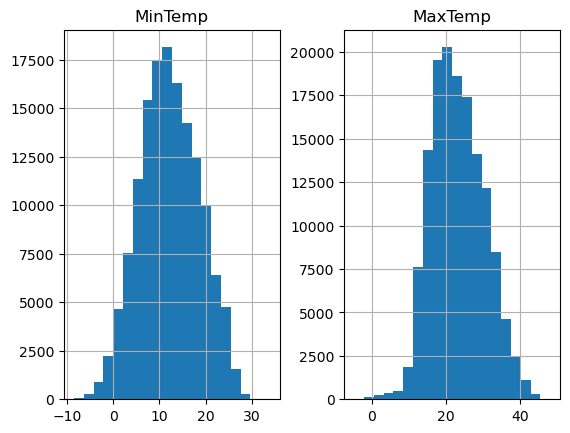

In [93]:
dataset[['MinTemp', 'MaxTemp']].hist(bins=20)

In [104]:
print('Cantidad de nulos (MinTemp): ', len(dataset[dataset['MinTemp'].isna()]))
print('Cantidad de nulos (MaxTemp): ', len(dataset[dataset['MaxTemp'].isna()]))

Cantidad de nulos (MinTemp):  1485
Cantidad de nulos (MaxTemp):  1261
